In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('data/titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.dropna(inplace=True)

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [7]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [8]:
accuracy_score(y_test,y_pred)*100

63.63636363636363

In [9]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy"))*100

np.float64(63.593505477308284)

In [10]:
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy="kmeans")
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy="kmeans")

In [11]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [12]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [13]:
trf.named_transformers_['first'].n_bins_

array([5])

In [14]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

In [15]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})
output

,age,age_trf,fare,fare_trf
328,31.0,2.0,20.5250,0.0
73,26.0,1.0,14.4542,0.0
253,30.0,2.0,16.1000,0.0
719,33.0,2.0,7.7750,0.0
666,25.0,1.0,13.0000,0.0
...,...,...,...,...
92,46.0,3.0,61.1750,1.0
134,25.0,1.0,13.0000,0.0
337,41.0,3.0,134.5000,2.0
548,33.0,2.0,20.5250,0.0


In [16]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['age_fare']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output

,age,age_trf,fare,fare_trf,age_labels,age_fare
328,31.0,2.0,20.5250,0.0,"(27.028, 39.354]","(0.0, 42.424]"
73,26.0,1.0,14.4542,0.0,"(12.696, 27.028]","(0.0, 42.424]"
253,30.0,2.0,16.1000,0.0,"(27.028, 39.354]","(0.0, 42.424]"
719,33.0,2.0,7.7750,0.0,"(27.028, 39.354]","(0.0, 42.424]"
666,25.0,1.0,13.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
...,...,...,...,...,...,...
92,46.0,3.0,61.1750,1.0,"(39.354, 54.215]","(42.424, 100.624]"
134,25.0,1.0,13.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
337,41.0,3.0,134.5000,2.0,"(39.354, 54.215]","(100.624, 186.5]"
548,33.0,2.0,20.5250,0.0,"(27.028, 39.354]","(0.0, 42.424]"


In [17]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)*100

62.23776223776224

In [18]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))*100

np.float64(63.0320813771518)

In [19]:
def discreatize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('secod',kbin_fare,[1]),
    ])
    x_trf=trf.fit_transform(x)
    np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))*100
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x["Age"])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")
    plt.show()

c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


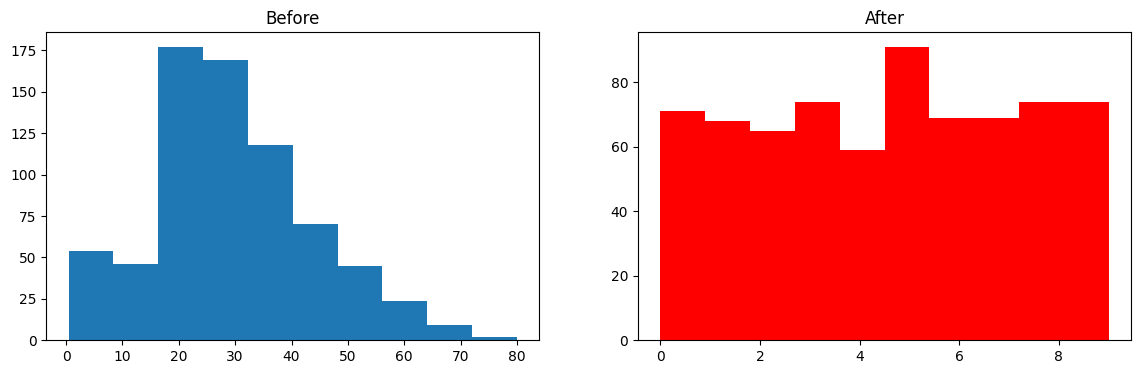

In [20]:
discreatize(10,'quantile')

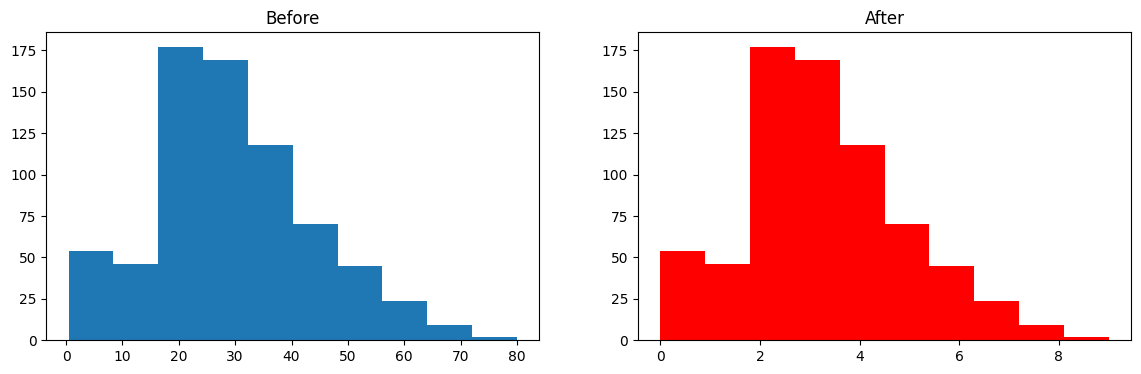

In [21]:
discreatize(10,'uniform')

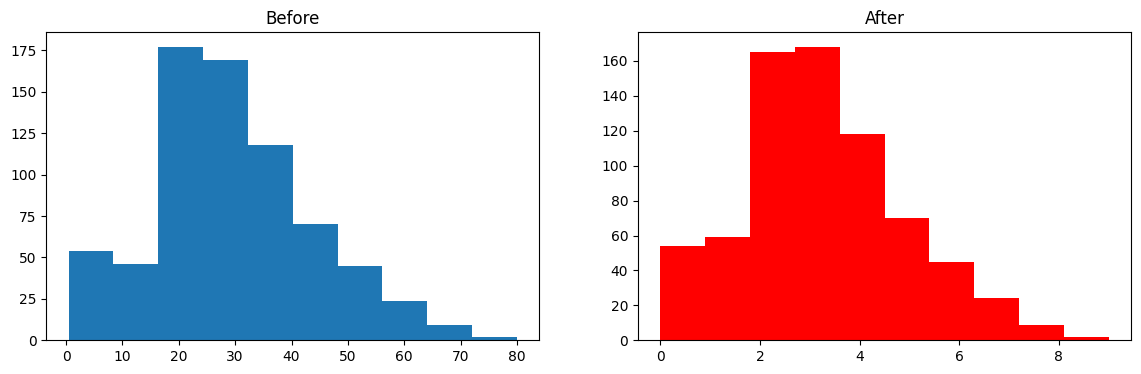

In [22]:
discreatize(10,'kmeans')